In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
import matminer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib Inline

# Pymatgen

In [2]:
with MPRester("....") as mpr:
    criteria = {"elements":{"$in":["Li", "Na", "K"], "$all": ["O"]}, "nelements":2}
    properties = ["pretty_formula", "formation_energy_per_atom", "band_gap"]
    shortC = (mpr.query(criteria, properties))
    
data = pd.DataFrame(shortC)
data

,pretty_formula,formation_energy_per_atom,band_gap
0,KO2,-0.950213,0.0000
1,KO3,-0.656296,0.7121
2,K2O,-1.193563,1.8534
3,K2O,-1.213501,0.4029
4,KO2,-0.926555,0.1546
...,...,...,...
58,NaO3,-0.603353,0.6243
59,NaO2,-0.884666,0.0000
60,Na2O2,-1.078611,0.0000
61,NaO2,-0.830114,0.0000


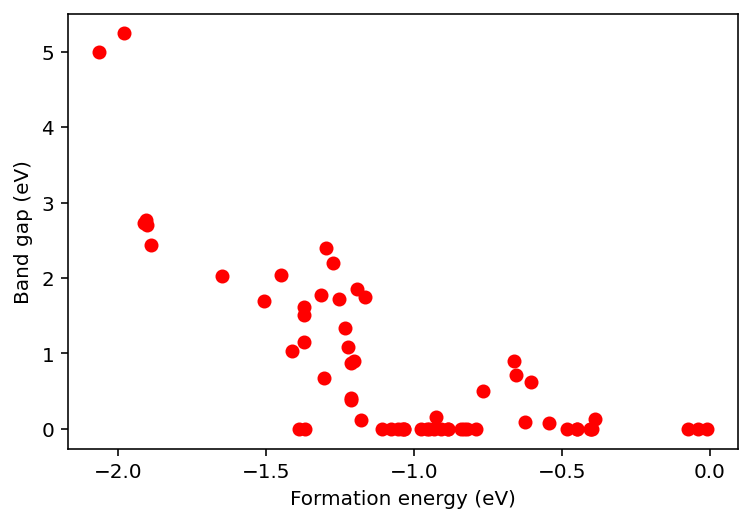

In [3]:
plt.plot(data["formation_energy_per_atom"], data["band_gap"], 'ro')
plt.xlabel("Formation energy (eV)")
plt.ylabel("Band gap (eV)")
plt.show();

In [4]:
with MPRester("....") as mpr:
    criteria = {"pretty_formula": "BaTiO3"}
    properties = ["task_id", "spacegroup.symbol", "final_energy", "band_gap"]
    shortC = (mpr.query(criteria, properties))
    
data = pd.DataFrame(shortC)
data

,task_id,spacegroup.symbol,final_energy,band_gap
0,mp-558125,C222_1,-240.251746,2.0811
1,mp-5777,Amm2,-40.056169,2.3733
2,mp-2998,Pm-3m,-39.984795,1.7252
3,mp-1076932,Amm2,-35.163458,0.0000
4,mp-504715,Pm-3m,-24.641710,0.0000
5,mp-995191,Amm2,-31.025462,0.0000
6,mp-19990,P4/mmm,-31.021441,0.0000
7,mp-644497,Amm2,-36.487377,0.5466
8,mp-5933,P6_3/mmc,-240.099121,1.7261
9,mp-5020,R3m,-40.058535,2.6212


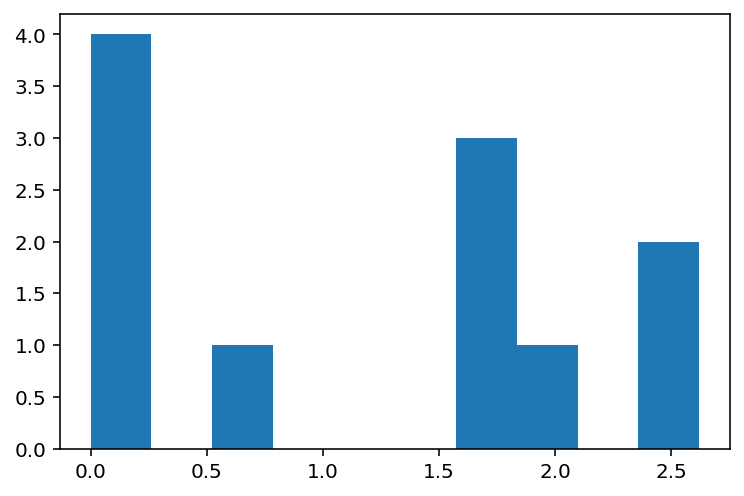

In [5]:
plt.hist(data["band_gap"])
plt.show();

## Oxide Perovskites

$ABO_3$

In [6]:
with MPRester("....") as mpr:
    perov = mpr.get_data("**O3")
    
data = pd.DataFrame(perov)
data.head()

,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,unit_cell_formula,pretty_formula,is_hubbard,elements,nelements,...,cif,total_magnetization,material_id,oxide_type,tags,elasticity,piezo,diel,deprecated,full_formula
0,-39.099719,-7.819944,58.671145,-3.699194,5,"{'Ac': 1.0, 'Al': 1.0, 'O': 3.0}",AcAlO3,False,"[Ac, Al, O]",3,...,# generated using pymatgen\ndata_AcAlO3\n_symm...,0.000000,mp-1183115,oxide,[],None,None,None,False,Ac1Al1O3
1,-35.960398,-7.192080,51.548126,-2.484567,5,"{'Ac': 1.0, 'B': 1.0, 'O': 3.0}",AcBO3,False,"[Ac, B, O]",3,...,# generated using pymatgen\ndata_AcBO3\n_symme...,0.000133,mp-1183052,oxide,[],None,None,None,False,Ac1B1O3
2,-40.252962,-8.050592,63.488393,-3.150949,5,"{'Ac': 1.0, 'Cr': 1.0, 'O': 3.0}",AcCrO3,True,"[Ac, Cr, O]",3,...,# generated using pymatgen\ndata_AcCrO3\n_symm...,3.000033,mp-866101,oxide,[],None,None,None,False,Ac1Cr1O3
3,-33.117727,-6.623545,61.365464,-2.432070,5,"{'Ac': 1.0, 'Cu': 1.0, 'O': 3.0}",AcCuO3,False,"[Ac, Cu, O]",3,...,# generated using pymatgen\ndata_AcCuO3\n_symm...,0.000028,mp-864606,oxide,[],"{'G_Reuss': 84.0, 'G_VRH': 84.0, 'G_Voigt': 85...",None,None,False,Ac1Cu1O3
4,-36.975717,-7.395143,64.691419,-2.876250,5,"{'Ac': 1.0, 'Fe': 1.0, 'O': 3.0}",AcFeO3,True,"[Ac, Fe, O]",3,...,# generated using pymatgen\ndata_AcFeO3\n_symm...,4.999780,mp-861502,oxide,[],None,None,None,False,Ac1Fe1O3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   energy                     2398 non-null   float64
 1   energy_per_atom            2398 non-null   float64
 2   volume                     2398 non-null   float64
 3   formation_energy_per_atom  2398 non-null   float64
 4   nsites                     2398 non-null   int64  
 5   unit_cell_formula          2398 non-null   object 
 6   pretty_formula             2398 non-null   object 
 7   is_hubbard                 2398 non-null   bool   
 8   elements                   2398 non-null   object 
 9   nelements                  2398 non-null   int64  
 10  e_above_hull               2398 non-null   float64
 11  hubbards                   2398 non-null   object 
 12  is_compatible              2398 non-null   bool   
 13  spacegroup                 2398 non-null   objec

In [8]:
perovskites = data[["material_id", "pretty_formula", "energy_per_atom", "band_gap", "formation_energy_per_atom",
                   "e_above_hull", "elements"]]
perovskites.head()

,material_id,pretty_formula,energy_per_atom,band_gap,formation_energy_per_atom,e_above_hull,elements
0,mp-1183115,AcAlO3,-7.819944,4.1024,-3.699194,0.000000,"[Ac, Al, O]"
1,mp-1183052,AcBO3,-7.192080,0.8127,-2.484567,0.792473,"[Ac, B, O]"
2,mp-866101,AcCrO3,-8.050592,2.0832,-3.150949,0.000000,"[Ac, Cr, O]"
3,mp-864606,AcCuO3,-6.623545,0.0000,-2.432070,0.000000,"[Ac, Cu, O]"
4,mp-861502,AcFeO3,-7.395143,1.1671,-2.876250,0.000000,"[Ac, Fe, O]"


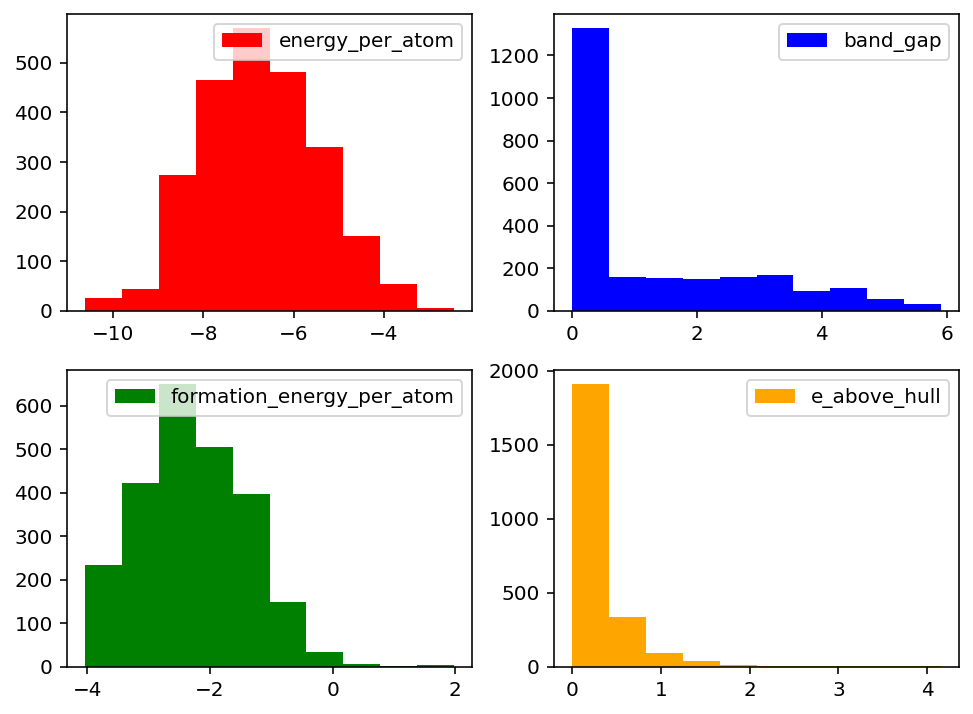

In [9]:
plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.hist(perovskites["energy_per_atom"], label="energy_per_atom", color="red")
plt.legend()

plt.subplot(222)
plt.hist(perovskites["band_gap"], label="band_gap", color="blue")
plt.legend()

plt.subplot(223)
plt.hist(perovskites["formation_energy_per_atom"], label="formation_energy_per_atom", color="green")
plt.legend()

plt.subplot(224)
plt.hist(perovskites["e_above_hull"], label="e_above_hull", color="orange")
plt.legend()

plt.show();

### Train ML

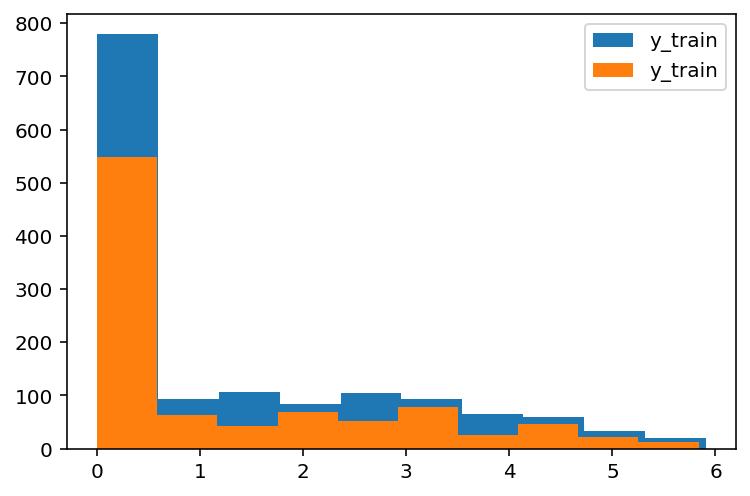

In [10]:
from sklearn.model_selection import train_test_split

y = perovskites["band_gap"].values
X = perovskites.drop(["material_id", "pretty_formula", "elements"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


plt.hist(y_train, label="y_train")
plt.hist(y_test, label="y_train")
plt.legend()

plt.show();

In [11]:
def algorithm(algo):
    y = perovskites["band_gap"].values
    X = perovskites.drop(["material_id", "pretty_formula", "elements"], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    algo =RandomForestRegressor()
    algo.fit(X_train, y_train)

    y_trained_pred = algo.predict(X_train)
    y_test_pred = algo.predict(X_test)

    from sklearn.metrics import mean_squared_error

    mse_train = mean_squared_error(y_train, y_trained_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print("Training RMSE = {:.5f} eV/atom".format(np.sqrt(mse_train)))
    print("Test RMSE = {:.5f} eV/atom".format(np.sqrt(mse_test)))

    plt.plot(y_train*100, y_trained_pred*100, 'ro', label="Training set")
    plt.plot(y_test*100, y_test_pred*100, 'bo', label="Test set")
    plt.plot([0, 10], [0, 10], 'k-')
    plt.title("{}".format(algo))
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.ylabel("Predicted (x $10^{-2}$ eV)")
    plt.xlabel("Input (x $10^{-2}$ eV)")
    plt.show();

Training RMSE = 0.00224 eV/atom
Test RMSE = 0.00468 eV/atom


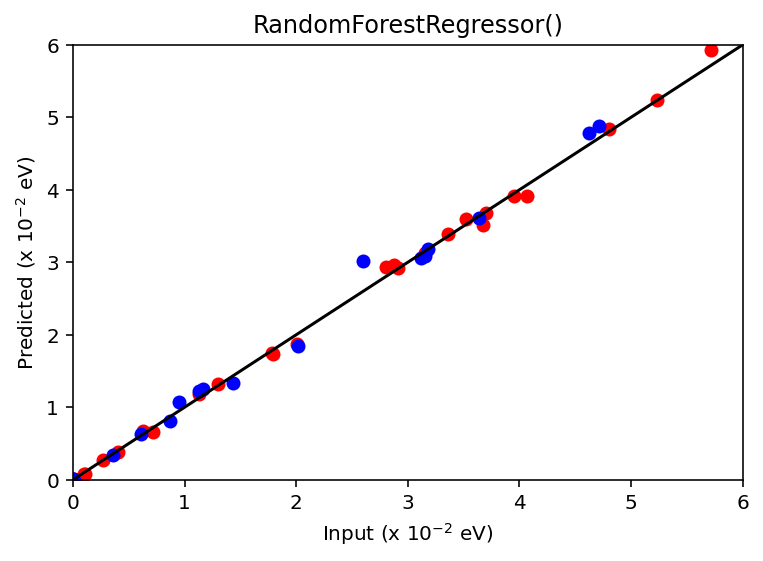

In [12]:
from sklearn.ensemble import RandomForestRegressor

algorithm(RandomForestRegressor)

Training RMSE = 0.00219 eV/atom
Test RMSE = 0.00472 eV/atom


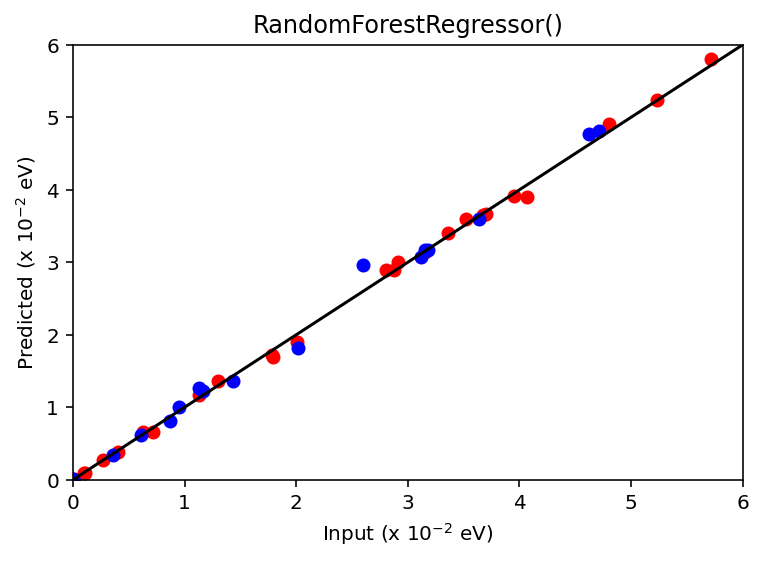

In [13]:
from sklearn.linear_model import BayesianRidge, ARDRegression, Lasso, LinearRegression, LogisticRegression, ridge_regression

algorithm(BayesianRidge)

Training RMSE = 0.00237 eV/atom
Test RMSE = 0.00479 eV/atom


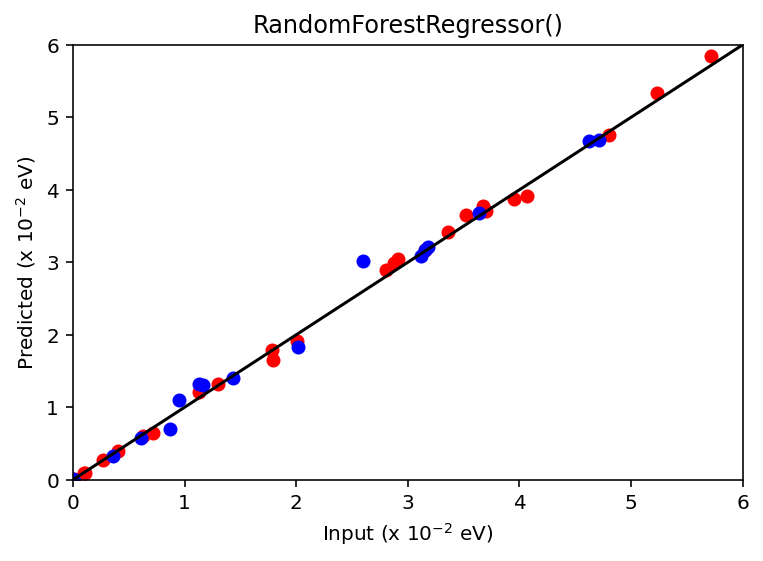

In [14]:
algorithm(ARDRegression)

Training RMSE = 0.00227 eV/atom
Test RMSE = 0.00450 eV/atom


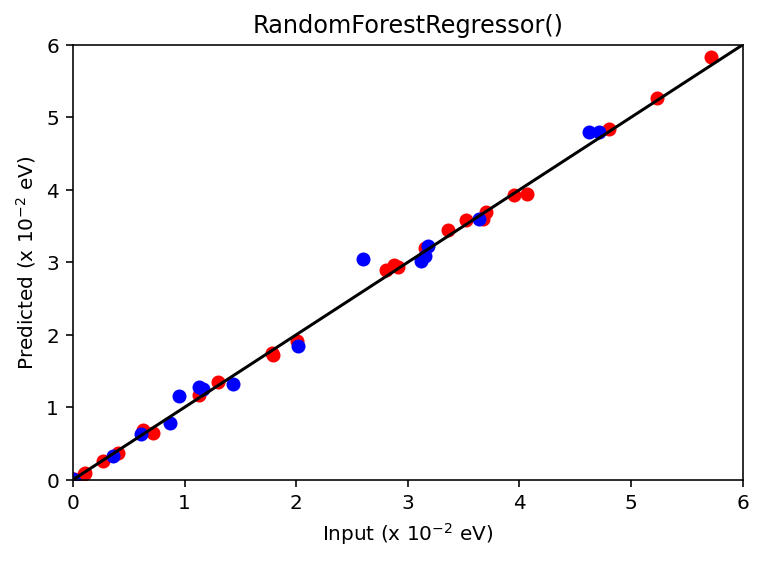

In [15]:
algorithm(Lasso)

Training RMSE = 0.00230 eV/atom
Test RMSE = 0.00465 eV/atom


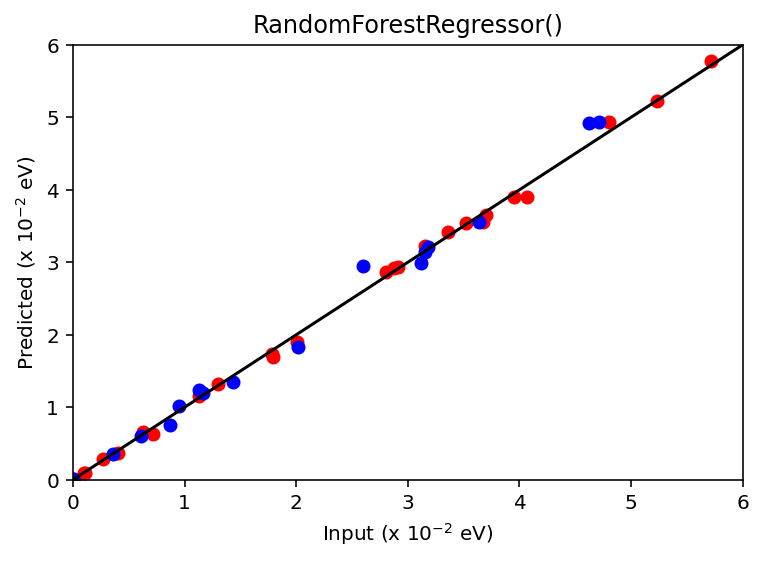

In [16]:
algorithm(LinearRegression)

Training RMSE = 0.00258 eV/atom
Test RMSE = 0.00462 eV/atom


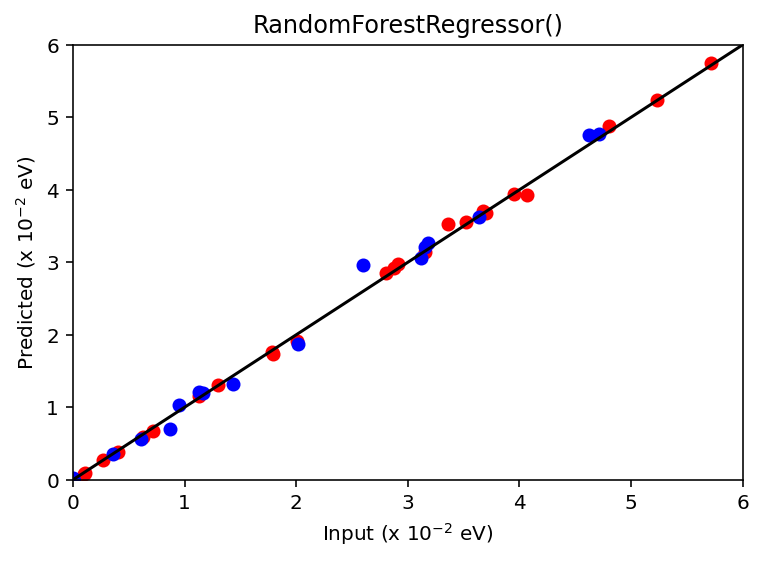

In [17]:
algorithm(LogisticRegression)

Training RMSE = 0.00239 eV/atom
Test RMSE = 0.00466 eV/atom


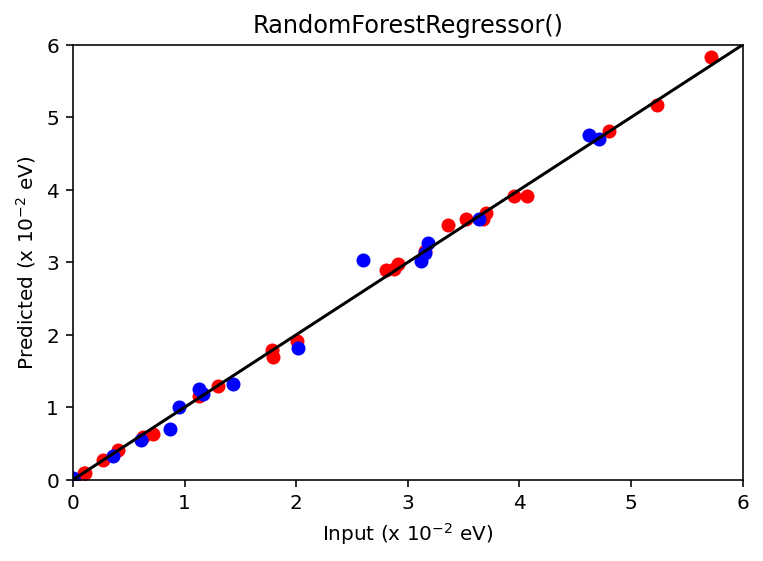

In [18]:
algorithm(ridge_regression)

Materials data access Taylor spark

In [19]:
# with MPRester("nb3XlTaW98NGIOTg") as mpr:

import pymatgen.core as mg
si = mg.Element("Si")
print(si.atomic_mass)
print(si.atomic_radius)

28.0855 amu
1.1 ang


In [20]:
from pymatgen.ext.matproj import MPRester

with MPRester(".....") as mpr:
    a = mpr.get_materials_ids("TaC")
    b = mpr.get_materials_ids("Ta-C")
print(a, b)

['mp-1009835', 'mp-1009832', 'mp-1086', 'mp-1009817'] ['mp-611448', 'mp-1097832', 'mp-1205283', 'mp-24', 'mp-1078845', 'mp-1244913', 'mp-1008374', 'mp-579909', 'mp-1181996', 'mp-1194362', 'mp-1188817', 'mp-1182684', 'mp-1197903', 'mp-568286', 'mp-683919', 'mp-1008395', 'mp-569416', 'mp-568806', 'mp-606949', 'mp-611426', 'mp-1147718', 'mp-570002', 'mp-616440', 'mp-1018088', 'mp-1040425', 'mp-937760', 'mp-990448', 'mp-1096869', 'mp-568028', 'mp-66', 'mp-997182', 'mp-1080826', 'mp-1203645', 'mp-1182029', 'mp-998866', 'mp-47', 'mp-630227', 'mp-1205417', 'mp-1244964', 'mp-569517', 'mp-1095534', 'mp-1196583', 'mp-680372', 'mp-169', 'mp-624889', 'mp-1245190', 'mp-667273', 'mp-568363', 'mp-1056957', 'mp-569304', 'mp-568410', 'mp-569567', 'mp-48', 'mp-1095633', 'mp-632329', 'mp-990424', 'mp-1190171', 'mp-1192619', 'mp-1009835', 'mp-1025192', 'mp-1009832', 'mp-1218120', 'mp-1218000', 'mp-1086', 'mp-7088', 'mp-1009817', 'mp-1187218', 'mp-6986', 'mp-569794', 'mp-42', 'mp-1076923', 'mp-50', 'mp-697

In [21]:
with MPRester(".....") as mpr:
    structure = mpr.get_structure_by_material_id("mp-1086")
    cohesive_energy = mpr.get_cohesive_energy("mp-1086")
    
print(structure)
print("Cohesive Energy = {}".format(cohesive_energy))

Full Formula (Ta1 C1)
Reduced Formula: TaC
abc   :   3.169306   3.169306   3.169306
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Ta    0    0    0          -0
  1  C     0.5  0.5  0.5         0
Cohesive Energy = 17.55140979


In [22]:
mpr = MPRester("......") 
materials = mpr.query("C-N-H-Pb-I", ["material_id", "pretty_formula", "band_gap", "nelements"])


HOIP = pd.DataFrame(materials)
HOIP.head()

,material_id,pretty_formula,band_gap,nelements
0,mp-995203,H6PbCI3N,1.7575,5
1,mp-1194995,H36Pb3C10(I5N2)2,1.7045,5
2,mp-995214,H6PbCI3N,1.7627,5
3,mp-995227,H6PbCI3N,1.5940,5
4,mp-977013,H6PbCI3N,2.4371,5


In [23]:
mpr = MPRester(".....") 
materials = mpr.query("**O3", ["material_id", "pretty_formula", "band_gap"])
materials

perov = pd.DataFrame(materials)
perov.head()

C:\Users\user\miniconda3\lib\site-packages\pymatgen\core\periodic_table.py:213: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\user\miniconda3\lib\site-packages\pymatgen\core\periodic_table.py:213: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\user\miniconda3\lib\site-packages\pymatgen\core\periodic_table.py:213: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\user\miniconda3\lib\site-packages\pymatgen\core\periodic_table.py:213: UserWarning: No electronegativity for Rf. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expe

,material_id,pretty_formula,band_gap
0,mp-1001571,CaFeO3,0.0000
1,mp-1016821,BaSiO3,1.0186
2,mp-1016823,BaGeO3,0.0000
3,mp-1016828,CdIrO3,0.0000
4,mp-1016833,CaRhO3,0.0000


In [24]:
perov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   material_id     2398 non-null   object 
 1   pretty_formula  2398 non-null   object 
 2   band_gap        2398 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.3+ KB


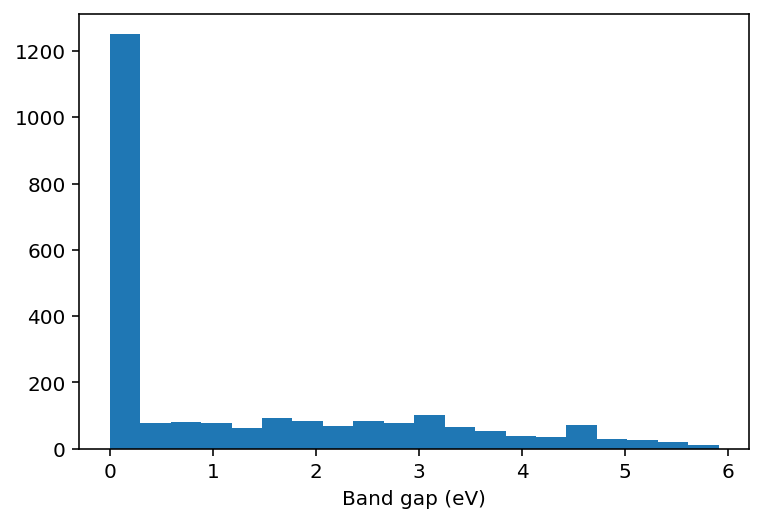

In [25]:
plt.hist(perov["band_gap"], bins=20)
plt.xlabel("Band gap (eV)")
plt.show();

In [26]:
materials = mpr.query({"chemsys":"O-Si"}, ['material_id', "band_gap"])

df = pd.DataFrame(materials)
df.head()

,material_id,band_gap
0,mp-557591,5.6144
1,mp-557653,4.1306
2,mp-639733,5.6305
3,mp-1249090,5.7815
4,mp-554151,5.7147


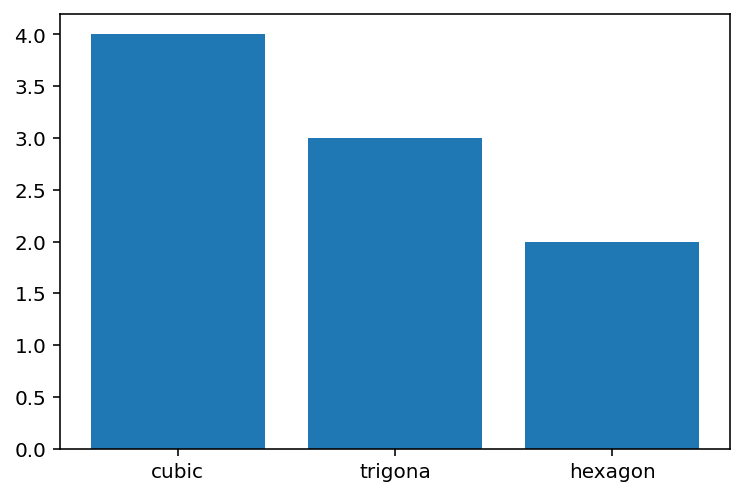

In [27]:
with MPRester("......") as mpr:
    entries = mpr.query("Ta-C", ["material_id", "spacegroup.crystal_system"])
    systems = [entry["spacegroup.crystal_system"] for entry in entries]
    counts = {}
    
    for system in systems:
        if system in counts:
            counts[system] += 1
        else:
            counts[system] = 1
            
    plt.bar(range(len(counts)), counts.values())
    plt.xticks(range(len(counts)), [key[0:7] for key in counts.keys()])


In [28]:
mpr = MPRester(".....")

criteria = {"elements":{"$in":["Li", "Na", "K"], "$all":["O"]}, # All compounds contain O, and must have either Li, Na, or K 
           "nelements":3,
           "icsd_ids": {"$gte":0},  # greater than or equal to "0"
           "e_above_hull": {"$lte": 0.01},   # less than or equal to "0.01"
            "anonymous_formula": {"A":1, "B":1, "C":3},  # ABO3
            "band_gap": {"$gt":1}  # greater than 1
           }

props = ["structure", "material_id", "pretty_formula", "e_above_hull", "band_gap",
        "band_structure"]
entries = mpr.query(criteria=criteria, properties=props)

print(len(entries))

for e in entries:
    print(e["pretty_formula"])
    print(e["band_gap"])
    print(e)
    break

53
KPO3
5.0422
{'structure': Structure Summary
Lattice
    abc : 4.622368 10.532778 14.283612732012022
 angles : 78.68805047946931 90.0 90.0
 volume : 681.9080032992589
      A : 4.622368 0.0 0.0
      B : 0.0 10.532778 0.0
      C : 0.0 2.80174 14.006136
PeriodicSite: K (1.2899, 11.7096, 9.3958) [0.2791, 0.9333, 0.6708]
PeriodicSite: K (3.6011, 3.0258, 11.6134) [0.7791, 0.0667, 0.8292]
PeriodicSite: K (3.3324, 1.6249, 4.6104) [0.7209, 0.0667, 0.3292]
PeriodicSite: K (1.0213, 10.3087, 2.3927) [0.2209, 0.9333, 0.1708]
PeriodicSite: K (3.4028, 8.1106, 8.8415) [0.7361, 0.6021, 0.6313]
PeriodicSite: K (1.0916, 6.6248, 12.1677) [0.2361, 0.3979, 0.8687]
PeriodicSite: K (1.2196, 5.2240, 5.1647) [0.2639, 0.3979, 0.3687]
PeriodicSite: K (3.5308, 6.7097, 1.8384) [0.7639, 0.6021, 0.1313]
PeriodicSite: P (3.6775, 3.8259, 7.7787) [0.7956, 0.2155, 0.5554]
PeriodicSite: P (1.3663, 10.9095, 13.2305) [0.2956, 0.7845, 0.9446]
PeriodicSite: P (0.9449, 9.5086, 6.2274) [0.2044, 0.7845, 0.4446]
PeriodicSite

# Viewing Si3N4 structure

In [29]:
from pymatgen.io.cif import CifParser
import nglview as nv
from nglview import show_structure_file

name = 'mp-697331'
mpr = MPRester(".....")
structure = mpr.get_structures(name)
# print(structure)

structure_cif = mpr.get_data(name, data_type='', prop='cif').get('cif')
# print(structure_cif)

# SAve the cif file to disc
with open("{}.cif".format(name), "w") as output:
    output.write(structure_cif)
    
# Visualise
view = nv.show_structure_file("{}.cif".format(name))
view._remote_call('setSize', args = ['', '600px'])
view.camera = 'orthographic'
view.add_unitcell()

# save
# view.download_image("{}.png".format(name))

view

NGLWidget()

In [30]:
structure

[Structure Summary
 Lattice
     abc : 7.882683366390471 7.882683366390471 6.500556316212483
  angles : 68.68079415898275 68.68079415898275 48.0063465923498
  volume : 275.4047791632832
       A : 3.206575 7.201012 0.0
       B : -3.206575 7.201012 0.0
       C : 0.0 2.587089 5.963573
 PeriodicSite: Mg (-0.1024, 3.6030, 0.5300) [0.2182, 0.2502, 0.0889]
 PeriodicSite: Mg (-0.1024, 12.0926, 2.4517) [0.7498, 0.7818, 0.4111]
 PeriodicSite: Mg (0.1024, 13.3862, 5.4335) [0.7818, 0.7498, 0.9111]
 PeriodicSite: Mg (0.1024, 4.8965, 3.5118) [0.2502, 0.2182, 0.5889]
 PeriodicSite: Mg (-3.0228, 7.8478, 1.4909) [0.0287, 0.9713, 0.2500]
 PeriodicSite: Mg (3.0228, 9.1413, 4.4727) [0.9713, 0.0287, 0.7500]
 PeriodicSite: Mg (0.2007, 7.8478, 1.4909) [0.5313, 0.4687, 0.2500]
 PeriodicSite: Mg (-0.2007, 9.1413, 4.4727) [0.4687, 0.5313, 0.7500]
 PeriodicSite: Ni (-1.7455, 5.6643, 0.4586) [0.1073, 0.6517, 0.0769]
 PeriodicSite: Ni (-1.7455, 10.0312, 2.5232) [0.3483, 0.8927, 0.4231]
 PeriodicSite: Ni (1.7455

# Matminer

In [31]:
from matminer.datasets import get_available_datasets
from pymatgen.core import Composition, Element, bonds
import pandas as pd

get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'wolverton_oxides']

In [32]:
from matminer.datasets import load_dataset

df = load_dataset("jarvis_dft_2d")
df.head()

,epsilon_x opt,epsilon_y opt,epsilon_z opt,exfoliation_en,structure,e_form,structure initial,jid,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,mpid,gap opt,composition
0,10.3295,10.3295,7.0367,63.593833,"[[1.49323139 3.32688406 7.26257785] Hf, [3.326...",-0.624,"[[1.49180494 3.32370494 7.25734791] Hf, [3.323...",JVASP-19990,NaN,NaN,NaN,NaN,mp-13963,0.0341,"(Hf, Si, Te)"
1,4.7325,5.6477,2.6267,134.863750,"[[1.85068084 4.37698238 6.9301577 ] As, [0. ...",0.160,"[[1.85325003 4.36491291 6.93222312] As, [0. ...",JVASP-31349,NaN,NaN,NaN,NaN,mp-158,0.7467,(As)
2,6.4357,5.2377,3.0070,43.114667,"[[ 0. 2.0213325 11.97279555] Ti, [ 1...",-2.231,"[[ 0. 2.0239455 11.96404455] Ti, [ 1...",JVASP-27890,NaN,NaN,NaN,NaN,mp-23002,0.0023,"(Ti, Br, O)"
3,9.3915,9.3915,4.2669,240.715488,"[[2.39882726 2.39882726 2.53701553] In, [0.054...",0.240,"[[2.53701507 2.53701507 2.53701604] In, [0.057...",JVASP-31353,NaN,NaN,NaN,NaN,mp-23313,0.0266,"(In, Bi)"
4,2.7367,2.7367,2.0162,67.442833,[[-1.83484554e-06 1.73300105e+00 2.61675943e...,-2.245,[[-2.000000e-06 1.731207e+00 2.616762e+00] N...,JVASP-31356,NaN,NaN,NaN,NaN,mp-25214,0.0484,"(Nb, O)"


In [33]:
from matminer.datasets import load_dataset

df = load_dataset("dielectric_constant")
df.head()

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,cif,meta,poscar
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Rb2 Te1\n1.0\n5.271776 0.000000 3.043661\n1.75...
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Cd1 Cl2\n1.0\n3.850977 0.072671 5.494462\n1.78...
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Mn1 I2\n1.0\n4.158086 0.000000 0.000000\n-2.07...
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,7.04,17.99,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,La2 N2\n1.0\n4.132865 0.000000 0.000000\n-2.06...
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,2.35,7.12,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLDAUTYPE ...,Mn2 F4\n1.0\n3.354588 0.000000 0.000000\n0.000...


In [34]:
from matminer.datasets import get_all_dataset_info

print(get_all_dataset_info("dielectric_constant"))

Dataset: dielectric_constant
Description: 1,056 structures with dielectric properties, calculated with DFPT-PBE.
Columns:
	band_gap: Measure of the conductivity of a material
	cif: optional: Description string for structure
	e_electronic: electronic contribution to dielectric tensor
	e_total: Total dielectric tensor incorporating both electronic and ionic contributions
	formula: Chemical formula of the material
	material_id: Materials Project ID of the material
	meta: optional, metadata descriptor of the datapoint
	n: Refractive Index
	nsites: The \# of atoms in the unit cell of the calculation.
	poly_electronic: the average of the eigenvalues of the electronic contribution to the dielectric tensor
	poly_total: the average of the eigenvalues of the total (electronic and ionic) contributions to the dielectric tensor
	poscar: optional: Poscar metadata
	pot_ferroelectric: Whether the material is potentially ferroelectric
	space_group: Integer specifying the crystallographic structure of t

In [35]:
df.columns

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'band_gap', 'e_electronic', 'e_total', 'n',
       'poly_electronic', 'poly_total', 'pot_ferroelectric', 'cif', 'meta',
       'poscar'],
      dtype='object')

In [36]:
df.describe()

,nsites,space_group,volume,band_gap,n,poly_electronic,poly_total
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,7.530303,142.970644,166.420376,2.119432,2.434886,7.248049,14.777898
std,3.388443,67.264591,97.425084,1.604924,1.148849,13.054947,19.435303
min,2.000000,1.000000,13.980548,0.110000,1.280000,1.630000,2.080000
25%,5.000000,82.000000,96.262337,0.890000,1.770000,3.130000,7.557500
50%,8.000000,163.000000,145.944691,1.730000,2.190000,4.790000,10.540000
75%,9.000000,194.000000,212.106405,2.885000,2.730000,7.440000,15.482500
max,20.000000,229.000000,597.341134,8.320000,16.030000,256.840000,277.780000


In [37]:
df["band_gap"]

0       1.88
1       3.52
2       1.17
3       1.12
4       2.87
        ... 
1051    0.87
1052    3.60
1053    0.14
1054    0.21
1055    0.26
Name: band_gap, Length: 1056, dtype: float64

In [38]:
df.iloc[1]

material_id                                                   mp-22881
formula                                                          CdCl2
nsites                                                               3
space_group                                                        166
volume                                                       84.298097
structure            [[0. 0. 0.] Cd, [ 4.27210959  2.64061969 13.13...
band_gap                                                          3.52
e_electronic         [[3.34688382, -0.04498543, -0.22379197], [-0.0...
e_total              [[7.97018673, -0.29423886, -1.463590159999999]...
n                                                                 1.78
poly_electronic                                                   3.16
poly_total                                                        6.73
pot_ferroelectric                                                False
cif                  #\#CIF1.1\n###################################...
meta  

In [39]:
# Filtre

mask = df["band_gap"] > 2.2
df[mask]

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,cif,meta,poscar
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Cd1 Cl2\n1.0\n3.850977 0.072671 5.494462\n1.78...
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,2.35,7.12,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLDAUTYPE ...,Mn2 F4\n1.0\n3.354588 0.000000 0.000000\n0.000...
11,mp-1672,CaS,2,225,46.695124,"[[0. 0. 0.] Ca, [2.3336455 1.6501365 4.0419925...",2.38,"[[4.98832393, 3.2599999999999997e-06, 1.514e-0...","[[12.09049261, 0.000290789999999, 2.1730000000...",2.23,4.99,12.09,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Ca1 S1\n1.0\n3.500468 0.000000 2.020996\n1.166...
12,mp-2530,Li2Te,3,225,69.537895,"[[1.33246225 0.942193 2.307892 ] Li, [3.997...",2.50,"[[4.96759206, 3.433e-05, -1.184e-05], [3.44600...","[[8.419476580000001, -0.00043652000000000003, ...",2.23,4.97,8.42,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Li2 Te1\n1.0\n3.997387 0.000000 2.307892\n1.33...
16,mp-1315,MgS,2,225,35.743489,"[[0. 0. 0.] Mg, [2.134732 1.5094835 3.697464 ...",2.76,"[[5.4004948200000005, -6.626e-05, -1.568000000...","[[16.01618817, 0.000940069999999, 0.0018529400...",2.32,5.40,16.02,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Mg1 S1\n1.0\n3.202098 0.000000 1.848732\n1.067...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,mp-5588,BaSiF6,8,166,110.246829,"[[2.003876 2.357052 1.7429385] Ba, [0. 0. 0....",7.42,"[[2.18952801, 0.03227471, 0.02386589], [0.0322...","[[8.79266341, -0.39666647, -0.29332863], [-0.3...",1.48,2.19,8.78,True,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Ba1 Si1 F6\n1.0\n4.802440 -0.011916 -0.682396\...
1048,mp-30058,TlSbO3,10,148,196.251592,"[[ 4.74259066 2.97725493 13.11556493] Tl, [2....",2.43,"[[4.06351653, -0.01514564, -0.06671735], [-0.0...","[[9.88843421, -0.18027358000000002, -0.7942900...",2.00,4.01,9.31,True,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Tl2 Sb2 O6\n1.0\n5.229548 0.089115 6.507557\n2...
1049,mp-23860,SrHCl,6,129,119.914288,"[[3.095943 3.095943 5.62892324] Sr, [1.031...",4.04,"[[3.51642873, 0.0, 0.0], [0.0, 3.51642873, 0.0...","[[9.40077505, 0.0, 1e-08], [0.0, 9.40075051, 1...",1.87,3.51,9.76,True,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Sr2 H2 Cl2\n1.0\n4.127924 0.000000 0.000000\n0...
1050,mp-605034,K2NiF6,9,225,139.856762,"[[1.68193375 1.18930675 2.91319475] K, [5.0458...",2.36,"[[2.29584983, 1.6e-07, 2.2999999999999997e-07]...","[[5.5624522899999995, -5.730000000000001e-05, ...",1.52,2.30,5.56,True,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLDAUTYPE ...,K2 Ni1 F6\n1.0\n5.045801 0.000000 2.913195\n1....


In [40]:
cleaned_df = df.drop(["nsites", "space_group", "e_electronic", "e_total"], axis=1)
cleaned_df.head()

,material_id,formula,volume,structure,band_gap,n,poly_electronic,poly_total,pot_ferroelectric,cif,meta,poscar
0,mp-441,Rb2Te,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,1.86,3.44,6.23,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Rb2 Te1\n1.0\n5.271776 0.000000 3.043661\n1.75...
1,mp-22881,CdCl2,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,1.78,3.16,6.73,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Cd1 Cl2\n1.0\n3.850977 0.072671 5.494462\n1.78...
2,mp-28013,MnI2,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,2.23,4.97,10.64,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Mn1 I2\n1.0\n4.158086 0.000000 0.000000\n-2.07...
3,mp-567290,LaN,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,2.65,7.04,17.99,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,La2 N2\n1.0\n4.132865 0.000000 0.000000\n-2.06...
4,mp-560902,MnF2,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,1.53,2.35,7.12,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLDAUTYPE ...,Mn2 F4\n1.0\n3.354588 0.000000 0.000000\n0.000...


In [41]:
df["poly_ionic"] = df["poly_total"] - df["poly_electronic"]
df.head()

,material_id,formula,nsites,space_group,volume,structure,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,cif,meta,poscar,poly_ionic
0,mp-441,Rb2Te,3,225,159.501208,"[[1.75725875 1.2425695 3.04366125] Rb, [5.271...",1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Rb2 Te1\n1.0\n5.271776 0.000000 3.043661\n1.75...,2.79
1,mp-22881,CdCl2,3,166,84.298097,"[[0. 0. 0.] Cd, [ 4.27210959 2.64061969 13.13...",3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Cd1 Cl2\n1.0\n3.850977 0.072671 5.494462\n1.78...,3.57
2,mp-28013,MnI2,3,164,108.335875,"[[0. 0. 0.] Mn, [-2.07904300e-06 2.40067320e+...",1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,Mn1 I2\n1.0\n4.158086 0.000000 0.000000\n-2.07...,5.67
3,mp-567290,LaN,4,186,88.162562,[[-1.73309900e-06 2.38611186e+00 5.95256328e...,1.12,"[[7.09316738, 7.99e-06, -0.0003864700000000000...","[[16.79535386, 8.199999999999997e-07, -0.00948...",2.65,7.04,17.99,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...,La2 N2\n1.0\n4.132865 0.000000 0.000000\n-2.06...,10.95
4,mp-560902,MnF2,6,136,82.826401,"[[1.677294 2.484476 2.484476] Mn, [0. 0. 0.] M...",2.87,"[[2.4239622, 7.452000000000001e-05, 6.06100000...","[[6.44055613, 0.0020446600000000002, 0.0013203...",1.53,2.35,7.12,False,#\#CIF1.1\n###################################...,{u'incar': u'NELM = 100\nIBRION = 8\nLDAUTYPE ...,Mn2 F4\n1.0\n3.354588 0.000000 0.000000\n0.000...,4.77


### Featurisers

In [42]:
from pymatgen.core import Composition
from matminer.featurizers.composition import ElementFraction

fe2o3 = Composition("Fe2O3")
ef = ElementFraction()

ef_features = ef.featurize(fe2o3)
ef_feature_labels = ef.feature_labels()
# ef_feature_labels

In [43]:
print(ef_features[7], ef_feature_labels[7]) # the composition of Fe2O3, oxygen is 3/5 = 0.6
print(ef_features[25], ef_feature_labels[25]) # the composition of Fe2O3, oxygen is 2/5 = 0.4

0.6 O
0.4 Fe


In [44]:
from matminer.datasets.dataset_retrieval import load_dataset

df = load_dataset("brgoch_superhard_training")
df.head()

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 0 to 2573
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   formula        2574 non-null   object 
 1   bulk_modulus   2574 non-null   float64
 2   shear_modulus  2574 non-null   float64
 3   composition    2574 non-null   object 
 4   material_id    2540 non-null   object 
 5   structure      2540 non-null   object 
 6   brgoch_feats   2574 non-null   object 
 7   suspect_value  2574 non-null   bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 163.4+ KB


In [46]:
ef.featurize_dataframe(df, "composition")

ElementFraction:   0%|          | 0/2574 [00:00<?, ?it/s]

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value,H,He,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,MgAsPt5,181.857661,70.362793,"(Mg, As, Pt)",mp-865146,"[[1.99379423 1.99379423 0. ] Mg, [0. ...","{'atomic_number_feat_1': 145.0, 'atomic_number...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
2570,YCBr,22.970769,9.733656,"(Y, C, Br)",mp-643367,"[[0.66584097 1.92338676 8.4823332 ] Y, [-0.645...","{'atomic_number_feat_1': 26.6666666666667, 'at...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
2571,NaTiO2,98.358957,70.565034,"(Na, Ti, O)",mp-7002,"[[ 3.31024633 2.00832854 11.99124842] O, [1.0...","{'atomic_number_feat_1': 16.3333333333333, 'at...",False,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,KCuSe,34.111565,21.586576,"(K, Cu, Se)",mp-7435,"[[0. 0. 0.] K, [0. 0. 4.903557...","{'atomic_number_feat_1': 27.3333333333333, 'at...",False,0,0,...,0,0,0,0,0,0,0,0,0,0


### Structural featuriser

In [47]:
df = load_dataset("phonon_dielectric_mp")

df.head()

,mpid,eps_electronic,eps_total,last phdos peak,structure,formula
0,mp-1000,6.311555,12.773454,98.585771,"[[2.8943817 2.04663693 5.01321616] Te, [0. 0....",BaTe
1,mp-1002124,24.137743,32.965593,677.585725,"[[0. 0. 0.] Hf, [-3.78195772 -3.78195772 -3.78...",HfC
2,mp-1002164,8.111021,11.169464,761.585719,"[[0. 0. 0.] Ge, [ 3.45311592 3.45311592 -3.45...",GeC
3,mp-10044,10.032168,10.128936,701.585723,"[[0.98372595 0.69559929 1.70386332] B, [0. 0. ...",BAs
4,mp-1008223,3.979201,6.394043,204.585763,"[[0. 0. 0.] Ca, [ 4.95 4.95 -4.95] Se]",CaSe


In [48]:
from matminer.featurizers.structure import DensityFeatures

density = DensityFeatures()
density.featurize_dataframe(df, "structure")  # new three columns are added: density, volum/atom, packing fraction

DensityFeatures:   0%|          | 0/1296 [00:00<?, ?it/s]

,mpid,eps_electronic,eps_total,last phdos peak,structure,formula,density,vpa,packing fraction
0,mp-1000,6.311555,12.773454,98.585771,"[[2.8943817 2.04663693 5.01321616] Te, [0. 0....",BaTe,4.937886,44.545547,0.596286
1,mp-1002124,24.137743,32.965593,677.585725,"[[0. 0. 0.] Hf, [-3.78195772 -3.78195772 -3.78...",HfC,9.868234,16.027886,0.531426
2,mp-1002164,8.111021,11.169464,761.585719,"[[0. 0. 0.] Ge, [ 3.45311592 3.45311592 -3.45...",GeC,5.760895,12.199996,0.394180
3,mp-10044,10.032168,10.128936,701.585723,"[[0.98372595 0.69559929 1.70386332] B, [0. 0. ...",BAs,5.087634,13.991016,0.319600
4,mp-1008223,3.979201,6.394043,204.585763,"[[0. 0. 0.] Ca, [ 4.95 4.95 -4.95] Se]",CaSe,2.750191,35.937000,0.428523
...,...,...,...,...,...,...,...,...,...
1291,mp-998603,4.178159,14.155681,142.585768,[[1.69099645e-03 3.81913207e+00 1.07685858e-01...,RbPbBr3,4.581318,38.593148,0.507357
1292,mp-998604,3.548202,13.938313,223.585761,[[1.64439731e-03 3.64832409e+00 1.03287739e-01...,RbPbCl3,3.933733,33.688084,0.542370
1293,mp-998612,3.960980,9.617663,219.718383,"[[-3.66731982 -1.91142875 2.96640499] K, [ 3....",KGeBr3,3.151275,37.038786,0.388217
1294,mp-999498,4.613954,4.972619,1090.585692,"[[ 1.57631457 -0.32583322 -1.57631457] N, [ 1....",N2,3.379498,6.882287,0.167146


## Conversion Featurisers

In [49]:
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition()
stc.featurize_dataframe(df, "formula")

StrToComposition:   0%|          | 0/1296 [00:00<?, ?it/s]

,mpid,eps_electronic,eps_total,last phdos peak,structure,formula,composition
0,mp-1000,6.311555,12.773454,98.585771,"[[2.8943817 2.04663693 5.01321616] Te, [0. 0....",BaTe,"(Ba, Te)"
1,mp-1002124,24.137743,32.965593,677.585725,"[[0. 0. 0.] Hf, [-3.78195772 -3.78195772 -3.78...",HfC,"(Hf, C)"
2,mp-1002164,8.111021,11.169464,761.585719,"[[0. 0. 0.] Ge, [ 3.45311592 3.45311592 -3.45...",GeC,"(Ge, C)"
3,mp-10044,10.032168,10.128936,701.585723,"[[0.98372595 0.69559929 1.70386332] B, [0. 0. ...",BAs,"(B, As)"
4,mp-1008223,3.979201,6.394043,204.585763,"[[0. 0. 0.] Ca, [ 4.95 4.95 -4.95] Se]",CaSe,"(Ca, Se)"
...,...,...,...,...,...,...,...
1291,mp-998603,4.178159,14.155681,142.585768,[[1.69099645e-03 3.81913207e+00 1.07685858e-01...,RbPbBr3,"(Rb, Pb, Br)"
1292,mp-998604,3.548202,13.938313,223.585761,[[1.64439731e-03 3.64832409e+00 1.03287739e-01...,RbPbCl3,"(Rb, Pb, Cl)"
1293,mp-998612,3.960980,9.617663,219.718383,"[[-3.66731982 -1.91142875 2.96640499] K, [ 3....",KGeBr3,"(K, Ge, Br)"
1294,mp-999498,4.613954,4.972619,1090.585692,"[[ 1.57631457 -0.32583322 -1.57631457] N, [ 1....",N2,(N)


## ML models

In [50]:
df = load_dataset("elastic_tensor_2015")
df = df[["structure", "formula", "K_VRH"]]

stc = StrToComposition()
df = stc.featurize_dataframe(df, "formula")

# ep = ElementFraction()
# df = ep.featurize_dataframe(df, "composition")

de = DensityFeatures()
df = de.featurize_dataframe(df, "structure")

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

In [51]:
df.head()

,structure,formula,K_VRH,composition,density,vpa,packing fraction
0,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",Nb4CoSi,194.268884,"(Nb, Co, Si)",7.834556,16.201654,0.688834
1,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",Al(CoSi)2,175.449907,"(Al, Co, Si)",5.384968,12.397466,0.644386
2,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",SiOs,295.077545,"(Si, Os)",13.968635,12.976265,0.569426
3,"[[0. 1.09045794 0.84078375] Ga, [0. ...",Ga,49.130670,(Ga),6.036267,19.180359,0.479802
4,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",SiRu2,256.768081,"(Si, Ru)",9.539514,13.358418,0.598395


In [52]:
y = df["K_VRH"]
X = df.drop(["structure", "formula", "composition", "K_VRH"], axis=1)

In [53]:
X.columns

Index(['density', 'vpa', 'packing fraction'], dtype='object')

In [54]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X, y)

y_pred = rf.predict(X)
mse = mean_squared_error(y, y_pred)
print("Training RMSE = {:.3f} GPa".format(np.sqrt(mse)))

Training RMSE = 12.386 GPa


## Cross validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=kfold)

rmse_score = [np.sqrt(abs(s)) for s in scores]
# rmse_score

print("Mean RMSE: {:.3f}".format(np.mean(rmse_score)))

Mean RMSE: 32.483


## Model performance

In [56]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_pred = cross_val_predict(rf, X, y, cv=kfold)

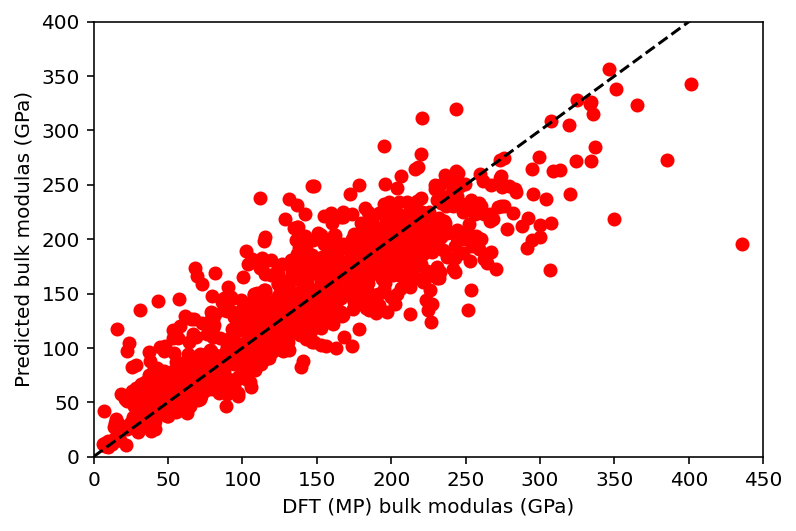

In [57]:
plt.plot(y, y_pred, 'ro')
plt.plot([0, 500], [0, 500], 'k--')
plt.xlabel("DFT (MP) bulk modulas (GPa)")
plt.ylabel("Predicted bulk modulas (GPa)")
plt.xlim(0, 450)
plt.ylim(0, 400)
plt.show();

## Model interpretation

In [58]:
rf.feature_importances_

array([0.31108464, 0.60610481, 0.08281055])

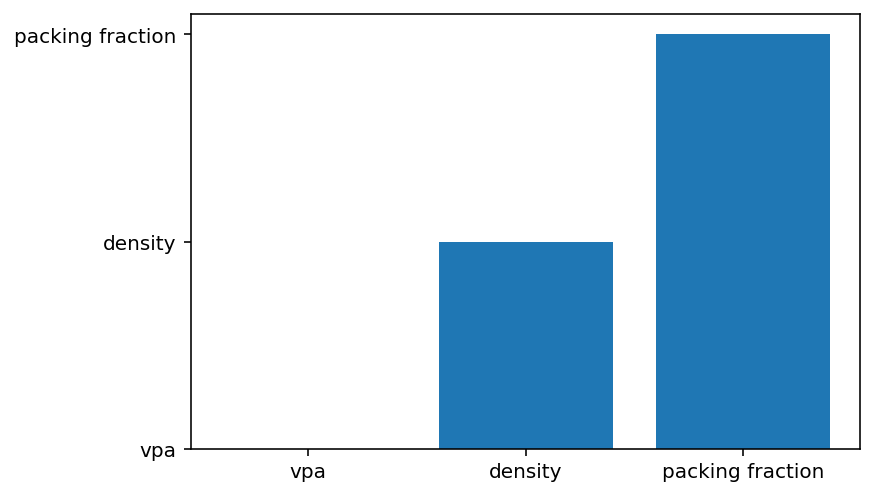

In [59]:
importances = rf.feature_importances_
include = X.columns.values
indices = np.argsort(importances)[::-1]
plt.bar(include[indices], include[indices]) 
plt.show()